In [12]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datagovindia import DataGovIndia
from fuzzywuzzy import process

import matplotlib
matplotlib.rc('font', family='Devanagari Sangam MN')

In [3]:
# To Sync The Data From Source
MY_API_KEY = "579b464db66ec23bdd000001973d3e2bd75e45f07473b608e00799e8"

datagovin = DataGovIndia(MY_API_KEY) # Specify API key if not set as an environment variable
# datagovin.sync_metadata(7000 , 20)

In [4]:
## IMPORTANT FUNCTIONS ##

# searching available dataframes by name
def search_datagov(search_term , columns = ['title', 'description']):
    search_data = datagovin.search(search_term)
    # search_data = datagovin.search(search_term , search_fields=columns)

    if len(search_data) > 0:

        search_titles = search_data['title']
        search_id = search_data['resource_id']

        # for res in zip(search_id , search_titles):
        #     print(res)

        return zip(search_id , search_titles)
    
    return "Not Found"

# getting a resource by ID, onvert it to csv as well
def datagov_data(r_id , save=False , filename = ''):
    data = datagovin.get_data(r_id)
    if save:
        data.to_csv(filename, index=False)

    print(data.columns)
    print(data.sample(5))
    return data

# show the non-intersecting columns of the 2 dfs, little outdated
def show_unmerged(df1 , df2 , col):
    # Perform an outer merge
    merged_outer = pd.merge(df1, df2, how='outer', on=col, indicator=True)

    # Filter out rows that were included in the inner merge
    deleted_rows = merged_outer[merged_outer['_merge'] == 'left_only']

    # Print the deleted rows
    print(deleted_rows)


# get population of the state (Census 2011)
def get_state_pop(state):
    india_df = pd.read_excel("2011-IndiaState.xlsx")
    
    # print(india_df.columns)

    states_total = india_df[['Name','TRU','TOT_P']][india_df['TRU'] == 'Total']
    states_total = states_total[['Name' , 'TOT_P']]
    
    best_match = process.extract(state, states_total['Name'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return states_total[states_total['Name'] == best_match]['TOT_P'].astype('int32').tolist()[0]


# rename all states so they are identical and ready for merging
def standardize_states(state_col):
    s_states = []

    # Iterate over each state name in the 'state' column
    for state in state_col:
        # Apply the standardize_states function to the state name and append the result to the list
        state_name = get_state_name(state)
        s_states.append(state_name)

    return s_states


# helper for standardize_states
def get_state_name(state):
    india_df = pd.read_csv("C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\Lucknow\\Unorganised_Workers_e-Shram_byStateFeb24.csv") # using these values of states as base
    
    # print(india_df.columns)

    states_total = india_df[['state_ut']]

    states_total['state_ut'] = states_total['state_ut'].str.upper()
 
    best_match = process.extract(state.upper(), states_total['state_ut'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return best_match


In [4]:
# SEARCH DATASETS

result = search_datagov("Crime/Atrocities against")

for x in result:
    print(x)

('da5c9463-bf9b-491c-8625-679a02a27395', 'City-wise Number of Police Disposal of Crime/Atrocities against Scheduled Tribe(s) in Metropolitan Cities during 2022')
('89c9622f-100e-4be4-9015-a35044ff3e62', 'City-wise Number of Court Disposal of Crime/Atrocities against Scheduled Tribe(s) in Metropolitan Cities during 2022')
('1f49b103-1e8a-44b4-a566-9a3a2313f86a', 'City-wise Number of Crime/Atrocities against Scheduled Tribe(s) in Metropolitan Cities from 2020 to 2022')
('28001562-948b-4899-a2d7-50b9b6594954', 'Crime Head-wise Number of Disposal of Persons Arrested for Crime/Atrocities against Scheduled Tribe(s) during 2022')
('9b7fbe43-02a6-4d0b-8bb6-394e4c51a500', 'City-wise Number of Disposal of Persons Arrested for Crime/Atrocities against Scheduled Tribe(s) in Metropolitan Cities during 2022')
('1d3a2104-bff4-427b-8408-deed94b2a5e7', 'Crime Head-wise Number of Disposal of Persons Arrested for Crime/Atrocities against Scheduled Tribe(s) during 2022')
('fb5bfef2-f000-4cb1-baa3-b972d6a4

In [5]:
'''
('566becd0-aecd-4e52-a97d-a13354eeae22', 'State/UT-wise Number of Crime/Atrocities against Scheduled Tribe(s) during 2022')
('a5be8d3b-8f25-4865-aa0c-15afd3ecc619', 'State/UT-wise Number of Crime/Atrocities against Scheduled Caste(s) during 2022')
'''
data_ST = datagov_data("566becd0-aecd-4e52-a97d-a13354eeae22" , False , "Crime_against_ST_2022.csv")

data_SC = datagov_data("a5be8d3b-8f25-4865-aa0c-15afd3ecc619" , False , "Crime_against_SC_2022.csv")

Index(['sl__no_', 'state_ut',
       'sc_st__prevention_of_atrocities__act_r_w_ipc__total____i___col__3_',
       'sc_st__prevention_of_atrocities__act_r_w_ipc__total____v___col__4_',
       'sc_st__prevention_of_atrocities__act_r_w_ipc__total____r___col__5_',
       'sc_st__prevention_of_atrocities__act___murder__sec__302_ipc____i___col__6_',
       'sc_st__prevention_of_atrocities__act___murder__sec__302_ipc____v___col__7_',
       'sc_st__prevention_of_atrocities__act___murder__sec__302_ipc____r___col__8_',
       'sc_st__prevention_of_atrocities__act___attempt_to_commit_murder__sec__307_ipc____i___col__9_',
       'sc_st__prevention_of_atrocities__act___attempt_to_commit_murder__sec__307_ipc____v___col__10_',
       ...
       'e__other_offences___r___col__140_',
       'total_of_sc_st__prevention_of_atrocities__act__with_and_without_ipc____i___col__141_',
       'total_of_sc_st__prevention_of_atrocities__act__with_and_without_ipc____v___col__142_',
       'total_of_sc_st__preventi

In [6]:
# DATA CLEANING FOR GOV DATA

df1 = data_ST[["state_ut" , "total_crime_atrocities_against_scheduled_tribes___v___col__148_"]]
df2 = data_SC[["state_ut" , "total_crime_atrocities_against_scheduled_castes___v___col__148_"]]

df1.columns = ['state' , 'crimes_ST']
df2.columns = ['state' , 'crimes_SC']

df1 = df1[:-2]
df2 = df2[:-2]

df1['crimes_ST'] = df1['crimes_ST'].astype('int')
df2['crimes_SC'] = df2['crimes_SC'].astype('int')

# merging the 2

df = df1.merge(df2)

df['total_cimes'] = df['crimes_ST'] + df['crimes_SC']

df['state'] = standardize_states(df['state'])

df

C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: ANDHRA PRADESH
Matched Value: ARUNACHAL PRADESH
Matched Value: ASSAM
Matched Value: BIHAR
Matched Value: CHHATTISGARH
Matched Value: GOA
Matched Value: GUJARAT
Matched Value: HARYANA
Matched Value: HIMACHAL PRADESH


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: JHARKHAND
Matched Value: KARNATAKA
Matched Value: KERALA
Matched Value: MADHYA PRADESH
Matched Value: MAHARASHTRA
Matched Value: MANIPUR
Matched Value: MEGHALAYA
Matched Value: MIZORAM
Matched Value: NAGALAND
Matched Value: ODISHA
Matched Value: PUNJAB


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: RAJASTHAN
Matched Value: SIKKIM
Matched Value: TAMIL NADU
Matched Value: TELANGANA
Matched Value: TRIPURA
Matched Value: UTTAR PRADESH
Matched Value: UTTARAKHAND
Matched Value: WEST BENGAL
Matched Value: TOTAL
Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: CHANDIGARH


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: DADRA AND NAGAR HAVELI AND DAMAN AND DIU
Matched Value: DELHI
Matched Value: JAMMU AND KASHMIR
Matched Value: LADAKH
Matched Value: LAKSHADWEEP
Matched Value: PUDUCHERRY


,state,crimes_ST,crimes_SC,total_cimes
0,ANDHRA PRADESH,415,2431,2846
1,ARUNACHAL PRADESH,0,0,0
2,ASSAM,12,15,27
3,BIHAR,148,6765,6913
4,CHHATTISGARH,520,337,857
5,GOA,1,8,9
6,GUJARAT,370,1388,1758
7,HARYANA,0,1659,1659
8,HIMACHAL PRADESH,4,222,226
9,JHARKHAND,285,691,976


In [7]:
# Readying Geodata File

shp_path =  "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\Survey-of-India-Index-Maps\\stateBoundary\\stateBoundary.shp"
map_gdf = gpd.read_file(shp_path)

map_gdf.columns = ['state' , 'geometry']

map_gdf['state'] = standardize_states(map_gdf['state'])

C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: CHANDIGARH
Matched Value: DADRA AND NAGAR HAVELI AND DAMAN AND DIU
Matched Value: DADRA AND NAGAR HAVELI AND DAMAN AND DIU
Matched Value: DELHI
Matched Value: HARYANA
Matched Value: JHARKHAND
Matched Value: KARNATAKA
Matched Value: KERALA
Matched Value: LAKSHADWEEP
Matched Value: MADHYA PRADESH
Matched Value: MAHARASHTRA
Matched Value: ODISHA
Matched Value: PUDUCHERRY


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: TAMIL NADU
Matched Value: CHHATTISGARH
Matched Value: TELANGANA
Matched Value: ANDHRA PRADESH
Matched Value: PUDUCHERRY
Matched Value: GOA
Matched Value: JAMMU AND KASHMIR
Matched Value: HIMACHAL PRADESH
Matched Value: PUNJAB
Matched Value: RAJASTHAN
Matched Value: GUJARAT
Matched Value: UTTARAKHAND
Matched Value: UTTAR PRADESH
Matched Value: SIKKIM
Matched Value: ASSAM


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: ARUNACHAL PRADESH
Matched Value: NAGALAND
Matched Value: MANIPUR
Matched Value: MIZORAM
Matched Value: TRIPURA
Matched Value: MEGHALAYA
Matched Value: WEST BENGAL
Matched Value: BIHAR


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()


In [9]:
# MERGE MAP TO GOVT DF

map_data = pd.merge(map_gdf , df , how='left' , on="state")

C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\1619927036.py:55: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  plt.savefig('Registered_Crimes_SC_ST_2022_Hindi.png' , dpi=300 , bbox_inches='tight')
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\1619927036.py:55: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.savefig('Registered_Crimes_SC_ST_2022_Hindi.png' , dpi=300 , bbox_inches='tight')
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\1619927036.py:55: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  plt.savefig('Registered_Crimes_SC_ST_2022_Hindi.png' , dpi=300 , bbox_inches='tight')
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_28600\1619927036.py:55: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.savefig('Registered_Crimes_SC_ST_2022_Hindi.png' , dpi=300 , bbox_inches='tight')
C:\Users\Ojasva Saxena\AppData\

<Figure size 640x480 with 0 Axes>

c:\Users\Ojasva Saxena\Desktop\Personal\Maps\mapvenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ojasva Saxena\Desktop\Personal\Maps\mapvenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ojasva Saxena\Desktop\Personal\Maps\mapvenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ojasva Saxena\Desktop\Personal\Maps\mapvenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ojasva Saxena\Desktop\Personal\Maps\mapvenv\lib\site-packages\IPython\core\pylabtools.py:170: User

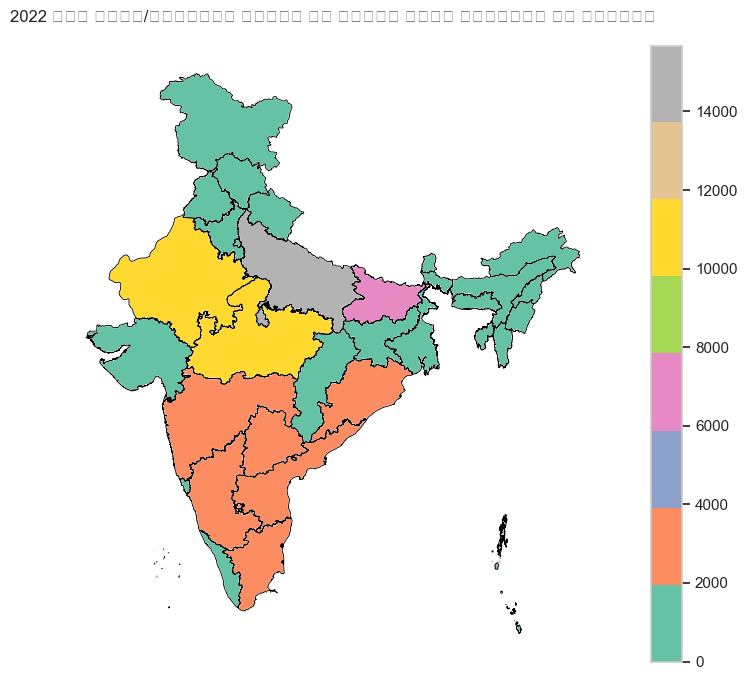

In [13]:
# PLOT MAP

'''
COLOURS:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd',
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''
'''
Set2 , Wistia , 
'''

value_column = 'total_cimes'

sns.set(style="whitegrid")  # Set seaborn style
sns.despine()  # Remove spines

# Create a figure and axis object
ax = map_data.boundary.plot(edgecolor="black" , linewidth=0.6 , figsize=(12,8))
map_data.plot(ax=ax, column=value_column , legend="True" , cmap='Set2') # Wistia

# for idx, row in map_data.iterrows():
# 	if row['change'] > 0:
# 	    change = "+" + str(round(row['change'] , 1))
# 	else:
# 	    change = "-" + str(round(row['change'] , 1))

# 	centroid = row.geometry.centroid
# 	ax.annotate(change, xy=(centroid.x, centroid.y), xytext=(0,0), textcoords="offset points", fontsize=9, color='darkred',fontfamily='serif')


# Set plot title and labels
# ax.set_title("Number of Crimes Registered against SC/ST folx in 2022")
ax.set_title("2022 में दलित/आदिवासी लोगों के खिलाफ दर्ज अपराधों की संख्या")
plt.axis("off")

# Save the plot
# plt.savefig('Registered_Crimes_SC_ST_2022.png' , dpi=300 , bbox_inches='tight')
plt.savefig('Registered_Crimes_SC_ST_2022_Hindi.png' , dpi=300 , bbox_inches='tight')
plt.show()